# Lab 8
## Data Structures & Algorithms
### Thursday, 11 April 2024

## Today
* [Divide-and-conquer refresher](#divide)
* [Examples](#examples)
* [Exercises](#exercises)

## Divide-and-conquer refresher

Divide-and-conquer algorithms are a powerful class of algorithms that solve a problem by breaking it down into smaller subproblems, solving the subproblems recursively, and then combining their solutions to solve the original problem. The basic steps of a divide-and-conquer algorithm are:

1. **Divide**: Break the problem into smaller, more manageable subproblems.
2. **Conquer**: Solve the subproblems recursively.
3. **Combine**: Merge the solutions of the subproblems to solve the original problem.

These algorithms are particularly useful for solving problems that can be broken down into similar subproblems, such as sorting and searching.

### Examples

You saw many examples for divide-and-conquer algorithms in the lecture, here is just a subselection of those:

- **Merge Sort**: A sorting algorithm that divides the array into two halves, sorts each half recursively, and then merges the sorted halves.
- **Quick Sort**: Another sorting algorithm that selects a pivot element, partitions the array around the pivot, and then sorts the subarrays recursively.
- **Binary Search**: A searching algorithm that divides the sorted array in half at each step to find the target element.
- **Strassen's Algorithm**: A matrix multiplication algorithm that divides matrices into smaller submatrices and combines their products efficiently.


## Motivation: Bubble Sort

Before we dive into more complex divide-and-conquer algorithms, let's first consider a simple sorting algorithm: bubble sort.

Idea: loop through the input array (from left to right) n times (n=length of array). In each pass, we swap two adjacent numbers if the first number is larger than the second. What will happen? After the first round, the largest number will be moved to the last place of the array. After the second round, the second largest number will be moved to the second last place, etc.

Here's an example implementation of selection sort in Python:

In [11]:
def bubble_sort_brute_force(arr):
    """
    Bubble sort 
    
    Parameters
    ----------
    arr : a list of number

    Returns
    ----------
    The list sorted in ascending order
    """
    
    arr_temp = list(arr)
    n = len(arr_temp)
    
    for i in range(n):
        for j in range(n - 1):
            # Get the difference between two adjacent numbers
            diff = arr_temp[j] - arr_temp[j + 1]
            if diff > 0:
                # Swap the two numbers
                arr_temp[j], arr_temp[j + 1] = arr_temp[j + 1], arr_temp[j]               

    return arr_temp

In [12]:
arr_1 = []
arr_2 = [3]
arr_3 = [3, 2]
arr_4 = [3, 2, 1, 4]

print(bubble_sort_brute_force(arr_1))
print(bubble_sort_brute_force(arr_2))
print(bubble_sort_brute_force(arr_3))
print(bubble_sort_brute_force(arr_4))

[]
[3]
[2, 3]
[1, 2, 3, 4]


The time complexity of bubble sort is $O(n^2)$ where $n$ is the number of elements in the array to be sorted. In the worst-case scenario, where the input array is in reverse order, bubble sort will need to make $n$ passes through the array, with each pass requiring $O(n)$ comparisons and swaps. Despite its simplicity, bubble sort is not efficient for sorting large arrays due to its quadratic time complexity.

### Improved bubble sort

We can save on some operations: in the first round, the largest number will be moved to the last place of the array. So in the second round, we do not have to consider the last element in the array as it is the largest element that we moved there in the first round. In the third round, we can ignore the last two elements, and so on. In round $i$, we can ignore the last $i-1$ elements:

In [13]:
def bubble_sort_improved(arr):
    """
    Bubble sort 
    
    Parameters
    ----------
    arr : a list of number

    Returns
    ----------
    The list sorted in ascending order
    """
    
    arr_temp = list(arr)
    n = len(arr_temp)
    
    for i in range(n):
        # in the second loop, we are leaving out the last i-1 elements of the array
        for j in range(n - i - 1):
            # Get the difference between two adjacent numbers
            diff = arr_temp[j] - arr_temp[j + 1]
            if diff > 0:
                # Swap the two numbers
                arr_temp[j], arr_temp[j + 1] = arr_temp[j + 1], arr_temp[j]               

    return arr_temp

Note that this still has running time $O(n^2)$, but it will still be a bit faster.

## Merge Sort

Merge sort is another sorting algorithm that follows the divide-and-conquer approach. It works by dividing the array into two halves, sorting each half recursively, and then merging the sorted halves:

<div>
   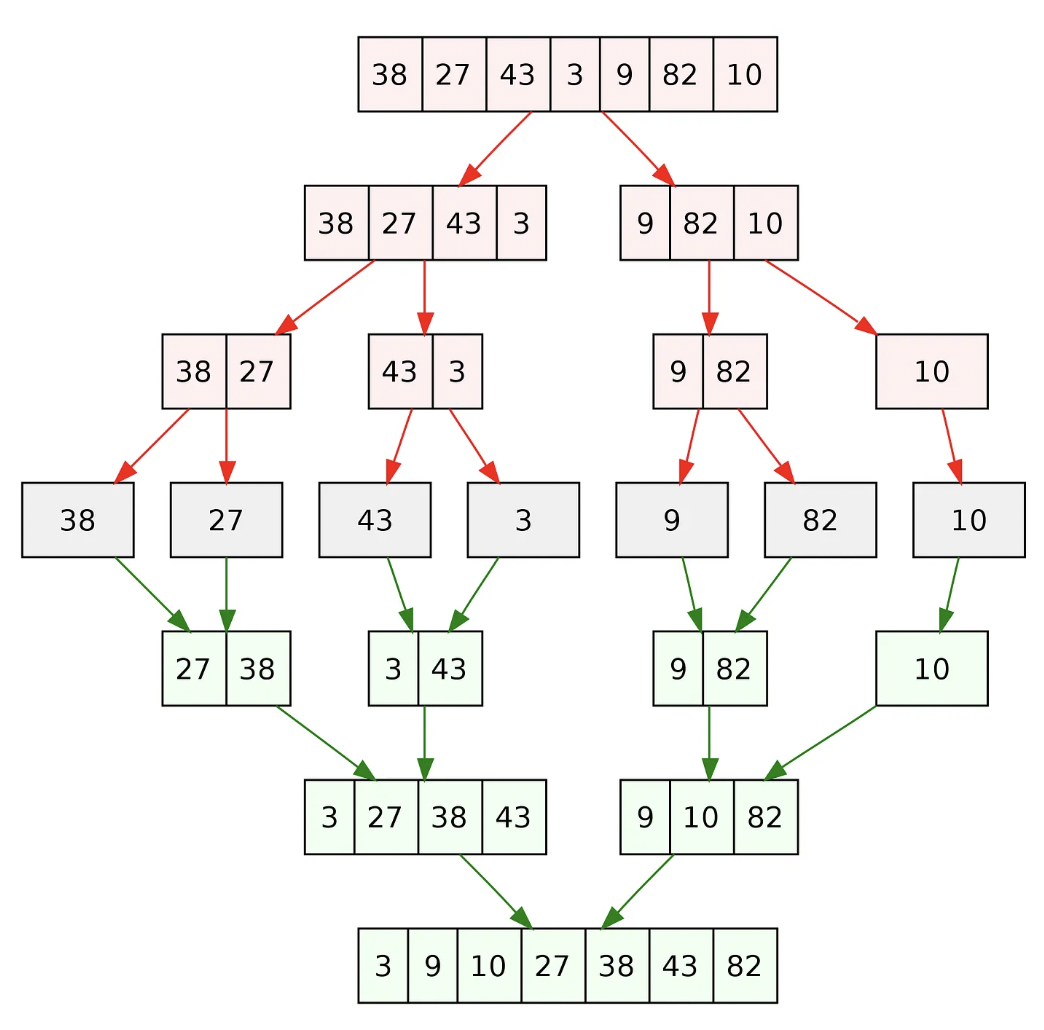
</div>

Here's an example implementation of merge sort in Python:

In [18]:
def merge_sort(arr):
    """
    Merge sort 
    
    Parameters
    ----------
    arr : a list of number

    Returns
    ----------
    The list sorted in ascending order
    """
    arr_temp = list(arr)
    n = len(arr_temp)    
    
    if n > 1: 
        # Divide the list into two smaller ones
        # The middle of the list
        mid = n // 2
        # The left sublist
        arr_temp_left = arr_temp[:mid] 
        # The right sublist
        arr_temp_right = arr_temp[mid:]
  
        # Recursively call merge_sort to sort the two smaller lists
        arr_temp_left = merge_sort(arr_temp_left)
        arr_temp_right = merge_sort(arr_temp_right)
          
        # Merge the two sorted smaller lists
        i = j = k = 0
        n_left, n_right = len(arr_temp_left), len(arr_temp_right)
          
        while i < n_left and j < n_right: 
            if arr_temp_left[i] < arr_temp_right[j]: 
                arr_temp[k] = arr_temp_left[i] 
                i += 1
            else: 
                arr_temp[k] = arr_temp_right[j] 
                j += 1
            k += 1
          
        # If there are elements in arr_temp_left that have not been visited 
        while i < n_left: 
            arr_temp[k] = arr_temp_left[i] 
            i += 1
            k += 1
 
        # If there are elements in arr_temp_right that have not been visited 
        while j < n_right: 
            arr_temp[k] = arr_temp_right[j] 
            j += 1
            k += 1
            
    return arr_temp

In [19]:
arr_1 = []
arr_2 = [3]
arr_3 = [3, 2]
arr_4 = [3, 2, 1, 4]

print(merge_sort(arr_1))
print(merge_sort(arr_2))
print(merge_sort(arr_3))
print(merge_sort(arr_4))

[]
[3]
[2, 3]
[1, 2, 3, 4]


### Time Complexity Analysis

Merge sort has a time complexity of O(n log n) in all cases, making it a more efficient sorting algorithm than, for example, bubble sort. It achieves this time complexity by dividing the array into halves recursively and merging the sorted halves efficiently.

## Exercises

### Exercise 1

Extend the bubble sort algorithm from above, to make it even more efficient. 

When we pass an already sorted array to the implementation of the algorithm above, it always goes through the array $n$ times, which is unnecessary. In this even further improved version, we want to make sure that after each round of passing through the array, we first check if the array has already been sorted and we terminate the algorithm as soon as we find that it has. Implement this according to the following idea:

* remember that we compare each two adjacent elements in the array and do a swap if the first is larger than the second
* this means that if no two elements were swapped in a round, the array is already sorted!
* include a variable in your code that indicates if any swap was made in a round
* then terminate the algorithm once the flag variable has not recorded any swaps

In [15]:
def bubble_sort_optimal(arr):
    """
    Bubble sort 
    
    Parameters
    ----------
    arr : a list of number

    Returns
    ----------
    The list sorted in ascending order
    """

    # Implement me

### Exercise 2

Modify the merge sort algorithm to sort the elements in descending order.

In [23]:
def merge_sort_desc(arr):
    """
    Merge sort in descending order
    
    Parameters
    ----------
    arr : list
        A list of numbers
    
    Returns
    -------
    list
        The list sorted in descending order
    """
    # Implement me

### Exercise 3

As discussed in the lecture, an **inversion** in an array is when for two elements `array[i]` and `array[j]` we have `array[i]` > `array[j]` and `i < j`. E.g. `array = [3,1,2]` has two inversion: `(3,1)` and `(3,2)`. In other words, an inversion is every pair of elements that is violating an ascending order of the elements.

Implement an algorithm for counting inversions in a naive way, where you go through every single pair of elements and check if it is an inversion. If it is, increase a counter by 1.

In [2]:
def count_inversions_brute_force(arr):
    """
    Count inversions in an array using the brute-force approach.
    
    Inversion in an array occurs when a pair of elements (arr[i], arr[j]) where i < j,
    and arr[i] > arr[j].
    
    Parameters
    ----------
    arr : list
        A list of numbers.

    Returns
    -------
    int
        The number of inversions in the array.
    """
    # Implement me

### Exercise 4

What is the time and space complexity of this algorithm?

### Exercise 5

Now, implement the counting inversions algorithm so that it runs in $O(n \log n)$ using divide-and-conquer. In the end, it should return the total number of inversions and the sorted input array. Remember what you learnt about this in the lectures and read the very helpful section in the Algorithm Design (Kleinberg & Tardos) textbook (in chapter 5). The following hints for the implementations (and the solutions that will be provided) come from [this](https://www.geeksforgeeks.org/python-program-for-count-inversions-in-an-array-set-1-using-merge-sort/) website. Do try this yourself before looking at the implementation!

* the idea of divide-and-conquer is always to recursively divide the array into subarrays
* imagine that we divide an array into two subarrays and manage to find the number of inversions for each
* to find the total number of inversions, we are then only missing the inversions that need to be counted across the two subarray (i.e. in the 'combination' or 'merge' step of the divide-and-conquer algorithm)
* so the total number of inversions is the number of inversions in the left subarray, right subarray, and merge().
* to get the number of inversions in merge(): let i is used for indexing left sub-array and j for right sub-array. At any step in merge(), if a[i] is greater than a[j], then there are (mid – i) inversions. because left and right subarrays are sorted, so all the remaining elements in left-subarray (a[i+1], a[i+2] … a[mid]) will be greater than a[j]

To deal with the last part of the algorithm (counting the inversions in 'merge'), write a merge-and-sort functions according to the following pseudo code from the Algorithm Design textbook:

```
Merge-and-Count(A,B)
    Maintain a Current pointer into each list, initialized to point to the front elements (e.g. use i and j, that are both 0 to start with)
    Maintain a variable Count for the number of inversions, initialized to 0
    While both lists are nonempty:
        Let ai and bj be the elements pointed to by the Current pointers, ai = A[i] and bj = B[j]
        Append the smaller of these two to the output list
        If bj is the smaller element:
            Increment Count by the number of elements remaining in A
        Endif
        Advance the Current pointer in the list from which the smaller element was selected.
    EndWhile
    Once one list is empty, append the remainder of the other list to the output
    Return Count and the merged list
```

In [53]:
def merge_and_count(A, B):
    """
    Merge two sorted lists and count inversions
    
    Parameters
    ----------
    A : list
        A sorted list.
    B : list
        Another sorted list.

    Returns
    ----------
    tuple
        A tuple containing the merged sorted list and the number of inversions.
    """
    # Implement me

### Exercise 6

We now use the function written in the last exercise, to write the algorithm for counting inversions, that we call `sort_and_count`.

Again, use the pseudo-code from the text book as a helper:

```
Sort-and-Count(L)
If the list has one element:
    there are no inversions
Else
    Divide the list into two halves:
        A contains the first ⌈n/2⌉ elements
        B contains the remaining ⌊n/2⌋ elements
    (rA, A) = Sort-and-Count(A)
    (rB, B) = Sort-and-Count(B)
    (r,L) = Merge-and-Count(A,B)
Endif
Return r =rA +rB +r, and the sorted list L
```

In [56]:
def sort_and_count(L):
    """
    Sort a list and count inversions using divide-and-conquer approach
    
    Parameters
    ----------
    L : list
        A list of elements.

    Returns
    ----------
    tuple
        A tuple containing the number of inversions and the sorted list.
    """
    
    # Implement me